In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import base64
import json
from io import BytesIO

from IPython.display import Javascript


%matplotlib notebook

In [2]:
filename = 'b2drop/Water_body_Salinity_2.4Danl.nc'

In [3]:
def read_file(filename):
    if filename.split('.')[-1] == 'nc':
        data = nc.Dataset(filename)
        time_var = data['time']
        lat = data['lat'][:]
        lon = data['lon'][:]
        sal = data['Salinity'][0, 0, :, :]
        return lat, lon, sal
lat, lon, sal = read_file(filename);

<IPython.core.display.Javascript object>


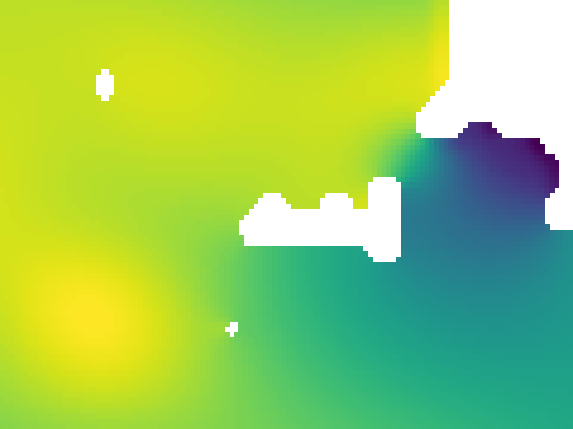

In [4]:
def create_img(sub, time): 
    data = nc.Dataset(filename)
    lat = data['lat'][:]
    lon = data['lon'][:]
    sal = data[sub][time, 0, :, :]
    image = BytesIO()
    lat_min = lat.min()
    lat_max = lat.max()
    lon_min = lon.min()
    lon_max = lon.max()
    fig = plt.figure(facecolor='pink')
    ax = fig.add_subplot(111)
    ax.set_axis_off()
    plt.pcolormesh(lon, lat, sal)
    fig.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,  hspace = 0, wspace = 0)
    ax.margins(0,0)
    ax.set_xlim(lon_min, lon_max)
    ax.set_ylim(lat_min, lat_max)
    ax.xaxis.set_major_locator(matplotlib.ticker.NullLocator())
    ax.yaxis.set_major_locator(matplotlib.ticker.NullLocator())
    plt.savefig(image, format='png', transparent=True, pad_inches=0, dpi=200)
    im = str(base64.b64encode(image.getvalue()))
    return json.dumps({
        'image': im, 
        'lat_min': lat_min,
        'lat_max': lat_max,
        'lon_min': lon_min,
        'lon_max': lon_max
    })
create_img('Salinity', 0);
# cbar = plt.colorbar()
# cbar.get_cmap

In [5]:
%%html

<head>
    <meta charset="utf-8" name='viewport' content='initial-scale=1,maximum-scale=1,user-scalable=no' />
    <script src='https://api.tiles.mapbox.com/mapbox-gl-js/v0.44.2/mapbox-gl.js'></script>
    <link href='https://api.tiles.mapbox.com/mapbox-gl-js/v0.44.2/mapbox-gl.css' rel='stylesheet' />
</head>
<div id='map_div' class='layer' style='width: 45vw; height: 80vh'/>

<style>
    path { mix-blend-mode: lighten; }
    .leaflet-zoom-animated { isolation: leaflet-zoom-animated; }
</style>

In [6]:
%%javascript
require.config({
  paths: {
      mapboxgl: 'https://api.tiles.mapbox.com/mapbox-gl-js/v0.44.2/mapbox-gl',
      bootstrap: 'https://maxcdn.bootstrapcdn.com/bootstrap/3.3.6/js/bootstrap.min',
      Bokeh: 'http://cdn.pydata.org/bokeh/release/bokeh-0.12.15'
    }
});


<IPython.core.display.Javascript object>

In [7]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;
require(['mapboxgl', 'bootstrap', 'Bokeh'], function(mapboxgl, bootstrap, Bokeh){
    mapboxgl.accessToken = 'pk.eyJ1IjoicnNiYXVtYW5uIiwiYSI6IjdiOWEzZGIyMGNkOGY3NWQ4ZTBhN2Y5ZGU2Mzg2NDY2In0.jycgv7qwF8MMIWt4cT0RaQ';
    var map = new mapboxgl.Map({
        container: 'map_div', // container id
        style: 'mapbox://styles/mapbox/light-v8', //stylesheet location
        center: [0, 0], // starting position
        zoom: 2 // starting zoom
    });
    map.once('style.load', function(e) {
        IPython.notebook.kernel.execute('create_img("Salinity", 0)', {
            iopub: {
                output: function(response) {
                    var output = JSON.parse(eval(response.content.data['text/plain']));
                    var url = "data:image/png;base64," + output['image'].slice(2, -1)
                    var lat_max = output['lat_max']
                    var lat_min = output['lat_min']
                    var lon_max = output['lon_max']
                    var lon_min = output['lon_min']
                    console.log(lat_max)
                    map.addLayer({
                        'id': 'salinity',
                        'type': 'raster',
                        'source': {
                            "type": "image",
                            "url": url,
                            "coordinates": [
                                            [lon_min, lat_max],
                                            [lon_max, lat_max],
                                            [lon_max, lat_min],
                                            [lon_min, lat_min]
                                          ]
                        },
                        'paint': {
//                             'raster-height': 10
                        }
                    })
                }                
            }
        }, {silent: false, store_history: false, stop_on_error: true}
        );
    });
});

<IPython.core.display.Javascript object>